# Install libraries

In [1]:
pip install catboost

# Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report


# load Data

In [3]:
train = pd.read_csv("/content/train_data.txt",sep=':::',names=['title', 'genre', 'description'],engine="python")
test = pd.read_csv("/content/test_data.txt",sep=':::',names=['id', 'title', 'description'],engine="python")

# Data exploration

In [4]:
train

,title,genre,description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [5]:
test

,id,title,description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard..."


In [6]:
print(train.shape)
print(test.shape)

(54214, 3)
(54200, 3)


In [7]:
train.isnull().sum()

,0
title,0
genre,0
description,0


In [8]:
test.isnull().sum()

,0
id,0
title,0
description,0


In [9]:
train.duplicated().sum()

0

In [10]:
test.duplicated().sum()

0

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        54214 non-null  object
 1   genre        54214 non-null  object
 2   description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           54200 non-null  int64 
 1   title        54200 non-null  object
 2   description  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [13]:
categories= train['genre'].unique()
categories

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

# data analysis

In [14]:
train['genre'] = train['genre'].str.strip()
genre_counts = train['genre'].value_counts()
print(genre_counts)


genre
drama          13613
documentary    13096
comedy          7447
short           5073
horror          2204
thriller        1591
action          1315
western         1032
reality-tv       884
family           784
adventure        775
music            731
romance          672
sci-fi           647
adult            590
crime            505
animation        498
sport            432
talk-show        391
fantasy          323
mystery          319
musical          277
biography        265
history          243
game-show        194
news             181
war              132
Name: count, dtype: int64


In [15]:
num_genres = train['genre'].nunique()
print(num_genres)

27


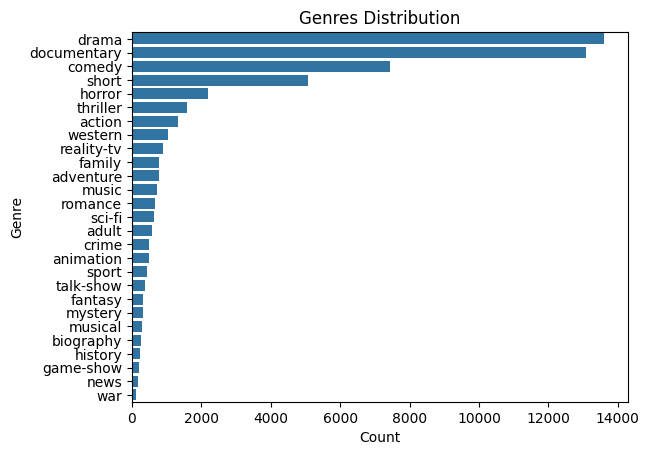

In [16]:
genre_counts = train['genre'].value_counts()
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Genres Distribution')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


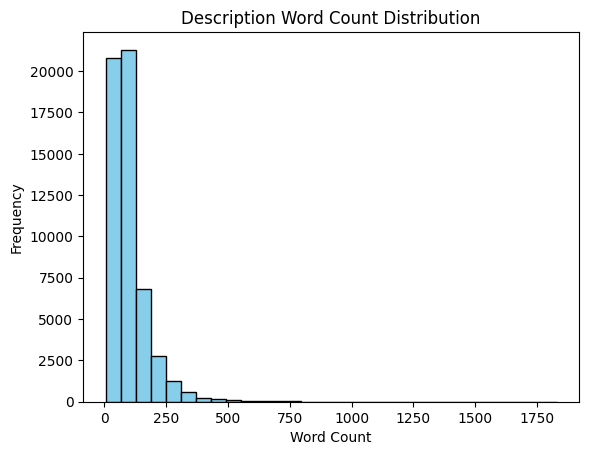

In [17]:
train['description_length'] = train['description'].apply(lambda x: len(x.split()))
plt.hist(train['description_length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Description Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


<ipython-input-18-a30b0b0d3c70>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_description_length.values, y=avg_description_length.index, palette='viridis')


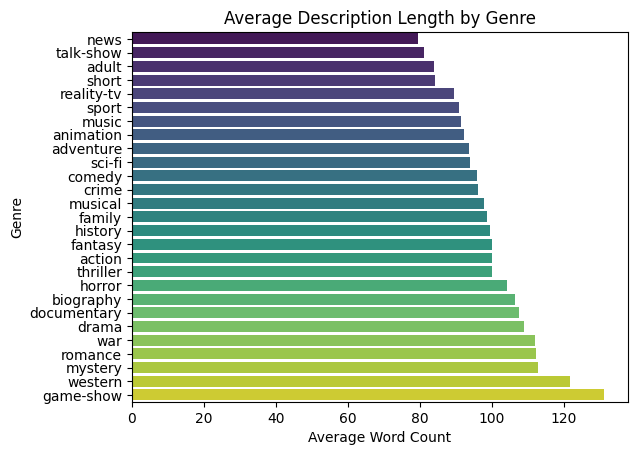

In [18]:
train['description_length'] = train['description'].apply(lambda x: len(x.split()))
avg_description_length = train.groupby('genre')['description_length'].mean().sort_values()

sns.barplot(x=avg_description_length.values, y=avg_description_length.index, palette='viridis')
plt.title('Average Description Length by Genre')
plt.xlabel('Average Word Count')
plt.ylabel('Genre')
plt.show()


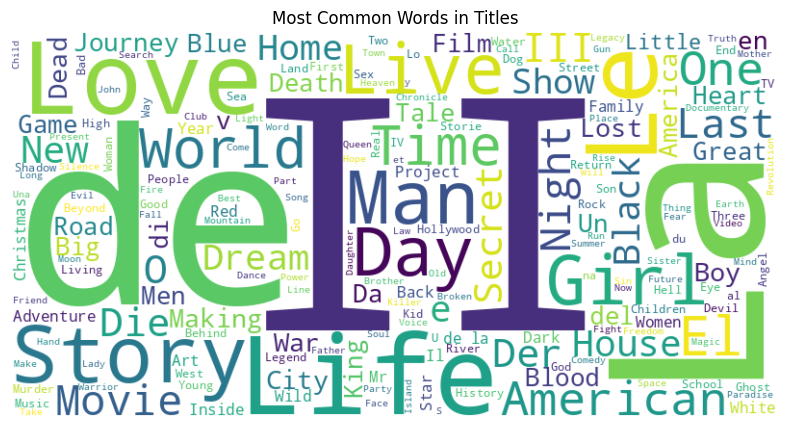

In [19]:
from wordcloud import WordCloud

text = " ".join(title for title in train['title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Titles')
plt.show()


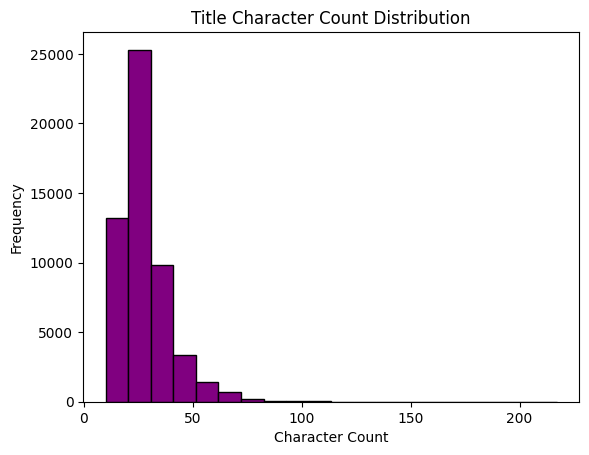

In [20]:
train['title_length'] = train['title'].apply(len)
plt.hist(train['title_length'], bins=20, color='purple', edgecolor='black')
plt.title('Title Character Count Distribution')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.show()


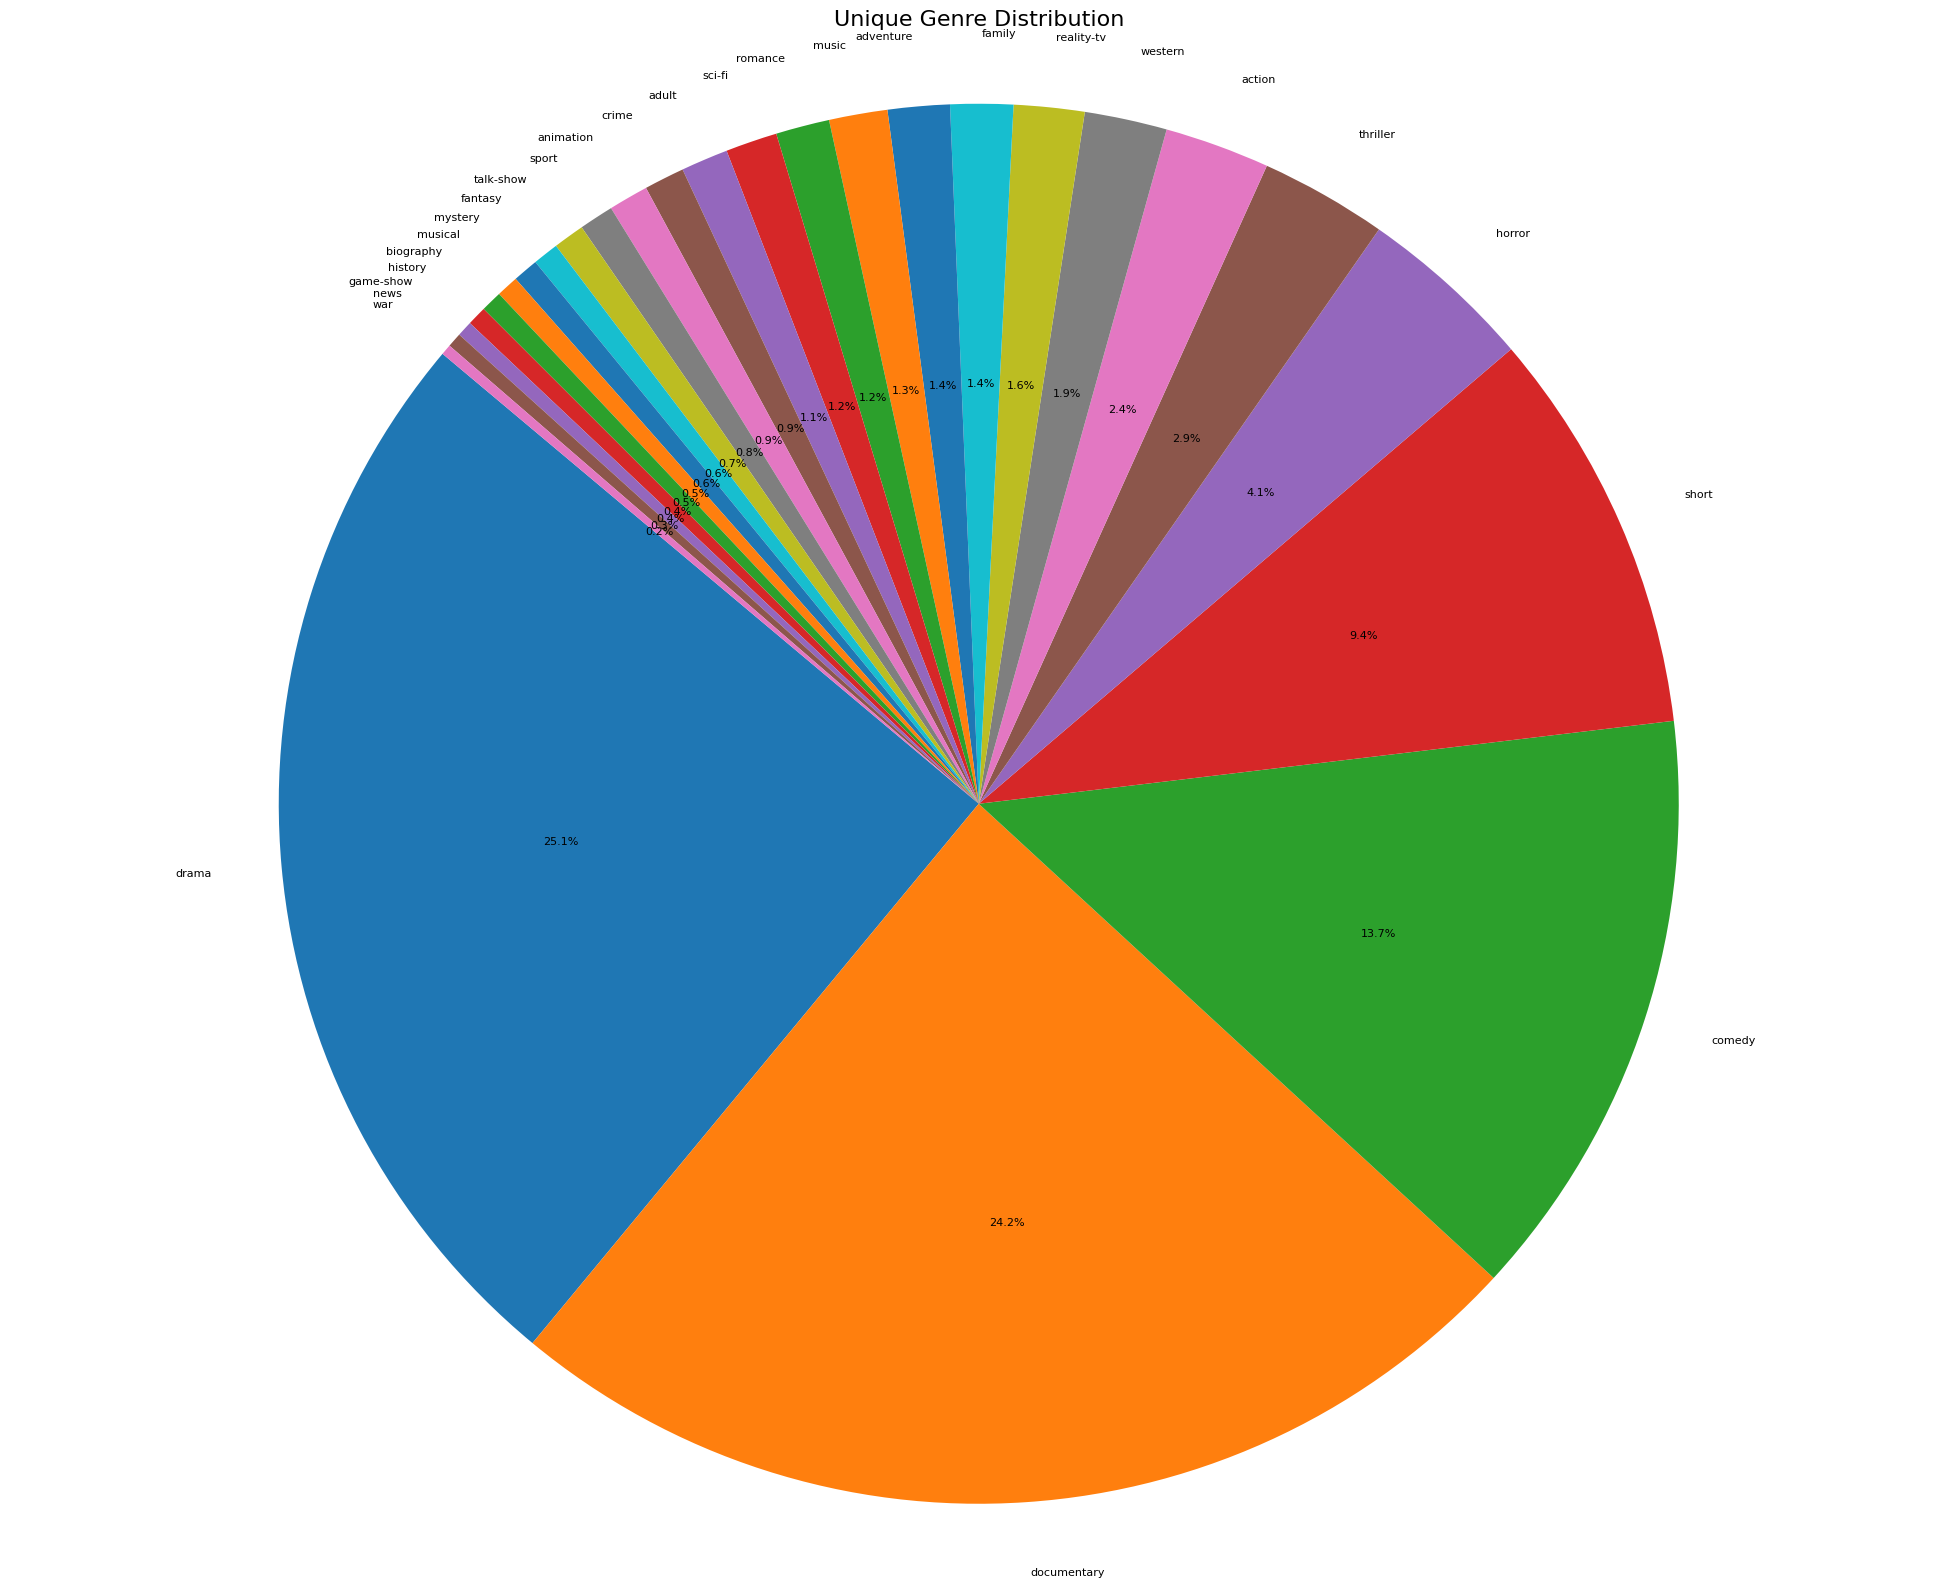

In [21]:
plt.figure(figsize=(25, 20))  # تحديد حجم الشكل
unique_genre_counts = train['genre'].value_counts()
plt.pie(
    unique_genre_counts,
    labels=unique_genre_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 8}  # تصغير حجم النصوص
)
plt.title('Unique Genre Distribution', fontsize=16)  # حجم عنوان أكبر
plt.axis('equal')
plt.show()


In [22]:
longest_description = train.iloc[train['description_length'].idxmax()]
shortest_description = train.iloc[train['description_length'].idxmin()]

print("Longest Description:\n", longest_description['description'])
print("Shortest Description:\n", shortest_description['description'])


Longest Description:
  Sonia, a recently graduated Language and Literature teacher, arrives to the Sarmiento High School, where she'll find all her educational principles defied by the eccentric teaching staff, which includes a controlling math teacher and her submissive husband, a history professor who constantly tries to pick up women with his rock band (without much success), and an ex-sex symbol as headmistress.
Shortest Description:
  Based on true stories, ALLURE is a process-driven film, where filmmakers and actors worked together through a series of improvisations to tell the stories of five women in New York, who come from five very different countries. Each one struggles to overcome her personal conflict, set against the Occupy Wall Street movements of 2011. These stories touch and inform each other, and create a larger narrative about gender, emigration, power, class, and personal politics.


# Preparing data for the model

In [23]:
train.columns

Index(['title', 'genre', 'description', 'description_length', 'title_length'], dtype='object')

In [24]:
train = train.drop(["title","description_length","title_length"],axis=1)

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   genre        54214 non-null  object
 1   description  54214 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [26]:
test.columns

Index(['id', 'title', 'description'], dtype='object')

In [27]:
test = test.drop("title",axis=1)

In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           54200 non-null  int64 
 1   description  54200 non-null  object
dtypes: int64(1), object(1)
memory usage: 847.0+ KB


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [30]:
def preprocess_text(dataframe, column_name):
    dataframe[column_name] = dataframe[column_name].str.lower()
    dataframe[column_name] = dataframe[column_name].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
    stop_words = set(stopwords.words('english'))
    dataframe[column_name] = dataframe[column_name].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
    lemmatizer = WordNetLemmatizer()
    dataframe[column_name] = dataframe[column_name].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
    dataframe[column_name] = dataframe[column_name].apply(lambda x: x if x.strip() != '' else 'empty')
    return dataframe

train = preprocess_text(train, 'description')
test = preprocess_text(test, 'description')


In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   genre        54214 non-null  object
 1   description  54214 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [33]:
train['genre'] = train['genre'].str.strip()
genre_counts = train['genre'].value_counts()
print(genre_counts)


genre
drama          13613
documentary    13096
comedy          7447
short           5073
horror          2204
thriller        1591
action          1315
western         1032
reality-tv       884
family           784
adventure        775
music            731
romance          672
sci-fi           647
adult            590
crime            505
animation        498
sport            432
talk-show        391
fantasy          323
mystery          319
musical          277
biography        265
history          243
game-show        194
news             181
war              132
Name: count, dtype: int64


In [34]:
def balance_data_with_oversampling(train, target_column):
    max_count = train[target_column].value_counts().max()
    balanced_data = pd.DataFrame()
    for genre, group in train.groupby(target_column):
        oversampled_group = group.sample(max_count, replace=True)
        balanced_data = pd.concat([balanced_data, oversampled_group])
    return balanced_data.sample(frac=1).reset_index(drop=True)

balanced_train = balance_data_with_oversampling(train, 'genre')

print(balanced_train['genre'].value_counts())


genre
short          13613
news           13613
mystery        13613
adult          13613
comedy         13613
music          13613
crime          13613
sport          13613
history        13613
family         13613
adventure      13613
biography      13613
reality-tv     13613
musical        13613
game-show      13613
talk-show      13613
sci-fi         13613
animation      13613
horror         13613
fantasy        13613
thriller       13613
war            13613
action         13613
romance        13613
drama          13613
western        13613
documentary    13613
Name: count, dtype: int64


In [35]:
balanced_train

,genre,description
0,short,focus video illustrate characteristic spirit r...
1,game-show,raven travel distant eastern land taking sixte...
2,western,short lived five week show secret law enforcem...
3,drama,sequel circle child 1977 teacher emotionally d...
4,romance,possible experience total alienation country f...
...,...,...
367546,comedy,parttime philosophy professor loaf philosophiz...
367547,romance,late 1960s people thought heart transplantatio...
367548,reality-tv,kindergarten 13part documentary series focus 2...
367549,biography,storyline egyptian theoretical physicist dr al...


In [36]:
test

,id,description
0,1,lr brane love life car apartment job especiall...
1,2,spain march 1964 quico naughty child three bel...
2,3,one year life albin family shepherd north tran...
3,4,father died hasnt spoken brother 10 year serio...
4,5,known internationally martial art superstar br...
...,...,...
54195,54196,covering multiple genre tale light dark anthol...
54196,54197,alice cora munro attempt find father british o...
54197,54198,movie 169 year making oliver twist artful dodg...
54198,54199,popular mysterious rock dj mike mallard askew ...


In [37]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(balanced_train['description'])
tfidf_test = tfidf_vectorizer.transform(test['description'])

print("TF-IDF balanced_train shape:", tfidf_train.shape)
print("TF-IDF test shape:", tfidf_test.shape)


TF-IDF balanced_train shape: (367551, 120659)
TF-IDF test shape: (54200, 120659)


In [38]:
x = tfidf_train
y = balanced_train['genre']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, shuffle=True,
                                          random_state=42)


# Create model

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [40]:
model1 = LogisticRegression()
model2 = RandomForestClassifier()
model3 = DecisionTreeClassifier()
model4 = GradientBoostingClassifier()
model5 = SVC()
model6 = MultinomialNB()

model7 = XGBClassifier()
model8 = CatBoostClassifier()
model9 = LGBMClassifier()

In [ ]:
# accuracies = []

# def model(model):
#     model.fit(xtrain,ytrain)
#     predict = model.predict(xtest)
#     accuracy = accuracy_score(predict,ytest)
#     print("accuracy =",accuracy)
#     accuracies.append(accuracy)

# model(model1)
# model(model2)
# model(model3)
# model(model4)
# model(model5)
# model(model6)


# models = {
#     "LogisticRegression": LogisticRegression(),
#     "RandomForestClassifier": RandomForestClassifier(),
#     "DecisionTreeClassifier": DecisionTreeClassifier(),
#     "GradientBoostingClassifier": GradientBoostingClassifier(),
#     "SVC": SVC(),
#     "MultinomialNB": MultinomialNB()
# }

# algorithms = list(models.keys())
# new = pd.DataFrame({"algorithms": algorithms, "accuracies": accuracies})
# new

In [41]:
logistic_model = LogisticRegression()

logistic_model.fit(xtrain, ytrain)
s1 = logistic_model.score(xtrain, ytrain)
s2 = logistic_model.score(xtest, ytest)
y_pred = logistic_model.predict(xtest)
print("Training Score:", s1)
print("Testing Score:", s2)
print(classification_report(ytest, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Score: 0.9676880696503877
Testing Score: 0.9516126838160275
              precision    recall  f1-score   support

      action       0.94      0.98      0.96      2701
       adult       0.97      1.00      0.99      2681
   adventure       0.97      0.99      0.98      2754
   animation       0.99      1.00      0.99      2786
   biography       0.99      1.00      1.00      2782
      comedy       0.82      0.77      0.79      2675
       crime       0.97      1.00      0.99      2745
 documentary       0.84      0.76      0.80      2700
       drama       0.75      0.65      0.70      2748
      family       0.95      1.00      0.98      2786
     fantasy       0.99      1.00      0.99      2745
   game-show       1.00      1.00      1.00      2736
     history       0.99      1.00      1.00      2657
      horror       0.93      0.95      0.94      2671
       music       0.96      1.00      0.98      2742
     musical       0.99      1.00      1.00      2733
     mystery

In [44]:
test_predictions = logistic_model.predict(tfidf_test)
test['predicted_genre'] = test_predictions
test[['description', 'predicted_genre']]


,description,predicted_genre
0,lr brane love life car apartment job especiall...,comedy
1,spain march 1964 quico naughty child three bel...,drama
2,one year life albin family shepherd north tran...,documentary
3,father died hasnt spoken brother 10 year serio...,drama
4,known internationally martial art superstar br...,drama
...,...,...
54195,covering multiple genre tale light dark anthol...,horror
54196,alice cora munro attempt find father british o...,western
54197,movie 169 year making oliver twist artful dodg...,drama
54198,popular mysterious rock dj mike mallard askew ...,horror
